# 灰度化圖像和原始色彩圖像的邊緣檢測
關於邊緣檢測的基礎是在邊緣部分，像素值出現"跳躍"或較大的變化，如果在此邊緣部分求取一階導數，就會看到極值出現
一階導數為極值的地方，二階導數為0，藉此原裡，進行邊緣檢測
- Laplace算法  可參考
http://www.opencv.org.cn/opencvdoc/2.3.2/html/doc/tutorials/imgproc/imgtrans/laplace_operator/laplace_operator.html?highlight=laplace

In [37]:
import cv2.cv as cv
import numpy as np

im = cv.LoadImage('img/0004.jpg', cv.CV_LOAD_IMAGE_COLOR)

#Laplace on a gray scale picture
gray = cv.CreateImage(cv.GetSize(im), 8, 1)
cv.CvtColor(im, gray, cv.CV_BGR2GRAY)

aperture = 3

dst = cv.CreateImage(cv.GetSize(gray), cv.IPL_DEPTH_32F, 1)
cv.Laplace(gray, dst, aperture)

cv.Convert(dst, gray)

thresholded = cv.CloneImage(im)
cv.Threshold(im, thresholded, 50, 255, cv.CV_THRESH_BINARY_INV)
cv.ShowImage('Laplaced grayscale', gray)
# cv.SaveImage("0004_gray.png", gray)

#Laplace on color
planes = [cv.CreateImage(cv.GetSize(im), 8, 1) for i in range(3)]
laplace = cv.CreateImage(cv.GetSize(im), cv.IPL_DEPTH_16S, 1)
colorlaplace = cv.CreateImage(cv.GetSize(im), 8, 3)

cv.Split(im, planes[0], planes[1], planes[2], None)
for plane in planes:
    cv.Laplace(plane, laplace, 3)
    cv.ConvertScaleAbs(laplace, plane, 1, 0)
    
cv.Merge(planes[0], planes[1], planes[2], None, colorlaplace)

cv.ShowImage('Laplace Color', colorlaplace)

# cv.SaveImage("0004_colorlaplace.png", colorlaplace)

cv.WaitKey(0)

-1

- Sobel算法
  是一種輪廓識別的算法，可參考
http://www.opencv.org.cn/opencvdoc/2.3.2/html/doc/tutorials/imgproc/imgtrans/sobel_derivatives/sobel_derivatives.html?highlight=sobel

In [39]:
import cv2.cv as cv

im = cv.LoadImage('img/0004.jpg', cv.CV_LOAD_IMAGE_GRAYSCALE)

sobx = cv.CreateImage(cv.GetSize(im), cv.IPL_DEPTH_16S,1)
cv.Sobel(im, sobx, 1, 0, 3)#Sobel with x-order=1

soby = cv.CreateImage(cv.GetSize(im), cv.IPL_DEPTH_16S,1)
cv.Sobel(im, sobx, 0, 1, 3)#Sobel with y-order=1

cv.Abs(sobx, sobx)
cv.Abs(soby, soby)
result = cv.CloneImage(im)
cv.Add(sobx, soby, result) #add the two results together

cv.Threshold(result, result,100, 255, cv.CV_THRESH_BINARY)

cv.ShowImage('Image', im)
cv.ShowImage('Result', result)
cv.SaveImage("0004_Sobel.png", result)

cv.WaitKey(0)

-1

- 未完成  --cv.MorphologyEX  也是一種邊緣檢測的算法，可參考
http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

In [5]:
import cv2
import numpy as np

img = cv2.imread('img/0004.jpg',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)  
dilation = cv2.dilate(img,kernel,iterations = 1)  
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
cv2.imshow('MorphologyEX',erosion)

- Canny 邊緣檢測，可以對直線邊界做出很好的檢測，可參考
http://www.opencv.org.cn/opencvdoc/2.3.2/html/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html?highlight=canny#canny

In [9]:
import cv2.cv as cv
import math
 
im=cv.LoadImage('img/0004.jpg', cv.CV_LOAD_IMAGE_GRAYSCALE)
 
pi = math.pi #Pi value
 
dst = cv.CreateImage(cv.GetSize(im), 8, 1)
 
cv.Canny(im, dst, 200, 200)
cv.Threshold(dst, dst, 100, 255, cv.CV_THRESH_BINARY)
 
#---- Standard ----
color_dst_standard = cv.CreateImage(cv.GetSize(im), 8, 3)
cv.CvtColor(im, color_dst_standard, cv.CV_GRAY2BGR)#Create output image in RGB to put red lines
 
lines = cv.HoughLines2(dst, cv.CreateMemStorage(0), cv.CV_HOUGH_STANDARD, 1, pi / 180, 100, 0, 0)
for (rho, theta) in lines[:100]:
    a = math.cos(theta) #Calculate orientation in order to print them
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (cv.Round(x0 + 1000*(-b)), cv.Round(y0 + 1000*(a)))
    pt2 = (cv.Round(x0 - 1000*(-b)), cv.Round(y0 - 1000*(a)))
    cv.Line(color_dst_standard, pt1, pt2, cv.CV_RGB(255, 0, 0), 2, 4) #Draw the line

    
#---- Probabilistic ----
color_dst_proba = cv.CreateImage(cv.GetSize(im), 8, 3)
cv.CvtColor(im, color_dst_proba, cv.CV_GRAY2BGR) # idem
 
rho=1
theta=pi/180
thresh = 50
minLength= 120 # Values can be changed approximately to fit your image edges
maxGap= 20
 
lines = cv.HoughLines2(dst, cv.CreateMemStorage(0), cv.CV_HOUGH_PROBABILISTIC, rho, theta, thresh, minLength, maxGap)
for line in lines:
    cv.Line(color_dst_proba, line[0], line[1], cv.CV_RGB(255, 0, 0), 2, 8)

cv.ShowImage('Image',im)
cv.ShowImage("Cannied", dst)
# cv.ShowImage("Hough Standard", color_dst_standard)
# cv.ShowImage("Hough Probabilistic", color_dst_proba)
cv.WaitKey(0)

-1

- 簡單版的Canny算法，只要指定最大和最小閥值即可

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/0004.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

- 可動態調整閥值的Canny算法

In [6]:
import cv2  
import numpy as np  
  
def CannyThreshold(lowThreshold):  
    detected_edges = cv2.GaussianBlur(gray,(3,3),0)  
    detected_edges = cv2.Canny(detected_edges,lowThreshold,lowThreshold*ratio,apertureSize = kernel_size)  
    dst = cv2.bitwise_and(img,img,mask = detected_edges)  # just add some colours to edges from original image.  
    cv2.imshow('canny demo',dst)  

lowThreshold = 0  
max_lowThreshold = 100  
ratio = 3  
kernel_size = 3  
  
img = cv2.imread('img/0004.jpg')  
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
  
cv2.namedWindow('canny demo')  
  
cv2.createTrackbar('Min threshold','canny demo',lowThreshold, max_lowThreshold, CannyThreshold)  
  
CannyThreshold(0)  # initialization  
if cv2.waitKey(0) == 27:  
    cv2.destroyAllWindows() 

- 辨識圖片內的角點(corner),哈里斯角點檢測方法 cv2.cornerHarris(灰階圖物件,blockSize,ksize,k) 此方法用於灰階圖準確度才高,所以記得先處理成灰階圖物件才傳入 此方法傳回的是角點位置圖的物件

In [23]:
import cv2
import numpy as np

filename = '0004_gray.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.05)

dst = cv2.dilate(dst, None)

img[dst>0.01*dst.max()] = [0,0,255]

cv2.imshow('dst', img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

- cv2.threshold(灰階圖物件,篩選門檻值,最大值,最小值,使用模式) 門檻值為像素顏色0~255,因為只能傳入灰階圖,所以是區別黑-灰-白用的方法
- cv2.THRESH_BINARY:二分法,低於門檻值的視為黑色,否則是白色

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

im = cv2.imread("0004_Sobel.png")
# im = cv2.resize(im, (250, 200)) 
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray,3,3,0.01)
ret, thresh1 = cv2.threshold(dst,0.001,255,cv2.THRESH_BINARY)
print thresh1
print cv2.imshow("0004_thresh.png", thresh1)
# cv2.imwrite("0004_thresh.png", thresh1)


[[   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.    0.]]
None


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

im1 = cv2.imread("0004_gray.png")
# im1 = cv2.resize(im1, (250, 200)) 
gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
dst1 = cv2.cornerHarris(gray1,3,3,0.01)
ret, thresh1 = cv2.threshold(dst1,0.001,255,cv2.THRESH_BINARY)
print thresh1

im2 = cv2.imread("0007_gray.png")
im2 = cv2.resize(im2, (250, 200)) 
gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
dst2 = cv2.cornerHarris(gray2,3,3,0.01)
ret, thresh2 = cv2.threshold(dst2,0.001,255,cv2.THRESH_BINARY)
print thresh2


# cv2.imwrite("0007_thresh.png", thresh1)


0.0204290984802


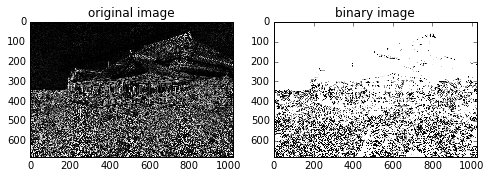

In [5]:
from skimage import data,filters
import matplotlib.pyplot as plt
import cv2

im = cv2.imread("0007_gray.png")
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray,3,3,0.01)
thresh = filters.threshold_otsu(dst)   #返回一个阈值
print thresh
dst =(dst <= thresh)*1.0   #根据阈值进行分割

plt.figure('thresh',figsize=(8,8))

plt.subplot(121)
plt.title('original image')
plt.imshow(im,plt.cm.gray)

plt.subplot(122)
plt.title('binary image')
plt.imshow(dst,plt.cm.gray)

plt.show()

C:\Anaconda2\lib\site-packages\skimage\filters\thresholding.py:132: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (768L, 1024L, 3L) looks like an RGB image
  warn(msg.format(image.shape))


98


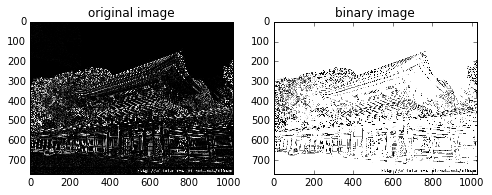

In [10]:
from skimage import data,filters
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("Kyoto_gray.png")
thresh = filters.threshold_otsu(image)   #返回一个阈值
print thresh
dst =(image <= thresh)*1.0   #根据阈值进行分割

plt.figure('thresh',figsize=(8,8))

plt.subplot(121)
plt.title('original image')
plt.imshow(image,plt.cm.gray)

plt.subplot(122)
plt.title('binary image')
plt.imshow(dst,plt.cm.gray)

plt.show()

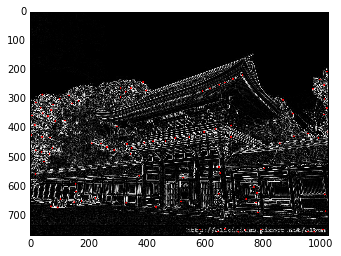

(<matplotlib.image.AxesImage at 0xb54d748>, None)

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Kyoto_gray.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,100,0.001,20)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()